# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### What drives the price of a used car?

 Are there qualitative or quantitative parameters that affect the price of a car?
 
 We will look at the database of used car and try to find relationships between the price and various other features.


 We will also look at patterns in the data to try to create a model that can predict prices based on those features.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

## Let's look at the data

 - Load data
 - Look at head, describe, info, NaN values, Duplicates
 - Then look at the variables on histogram
 - Let's look at the correlation matrix

In [104]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/vehicles.csv')

In [3]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
df.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
42741,7314659406,orange county,12995,2016.0,kia,soul,NaN,NaN,gas,36677.0,clean,automatic,KNDJN2A25G7846661,NaN,compact,wagon,black,ca
189297,7311504237,south coast,14699,2013.0,chevrolet,camaro,NaN,6 cylinders,gas,46693.0,clean,automatic,2G1FB1E31D9104059,rwd,NaN,other,silver,ma
311787,7313857136,bend,31477,2017.0,jeep,grand cherokee,excellent,NaN,gas,31269.0,clean,automatic,1C4RJFAGXHC927097,4wd,NaN,SUV,NaN,or
36155,7312994924,merced,13222,2013.0,honda,civic cpe si,good,4 cylinders,gas,144500.0,clean,manual,2HGFG4A58DH706224,fwd,NaN,coupe,blue,ca
375754,7315310960,houston,21995,2014.0,ford,mustang,NaN,NaN,gas,83279.0,clean,automatic,1ZVBP8CF9E5301599,NaN,sub-compact,coupe,red,tx


In [5]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
df.isna().mean()*100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

### Looks like we have a lot of NaN values in our dataset, we'll take care of that later

In [8]:
df.duplicated().sum()

0

Text(0.4, 1, 'Histograms of numerical features')

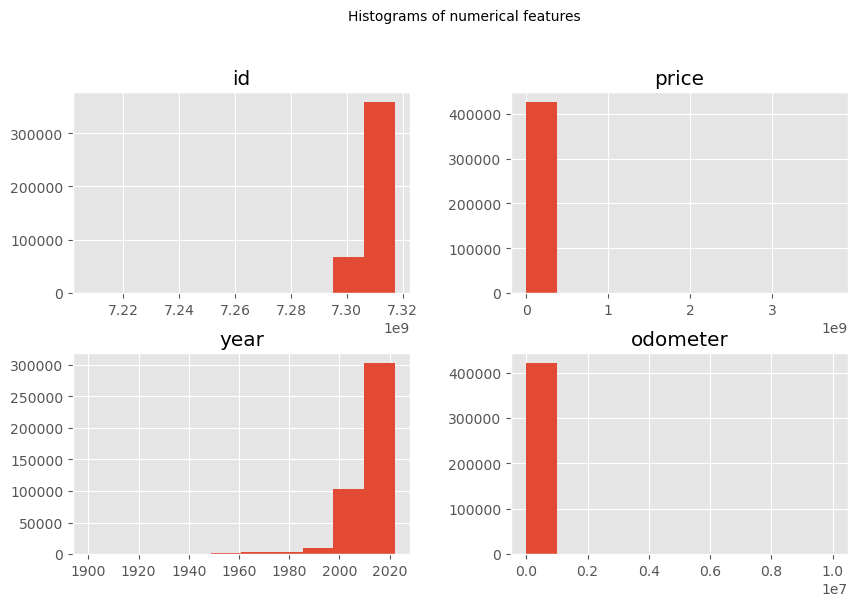

In [128]:
df.hist(figsize = (10,6));
plt.figtext(0.4,1,"Histograms of numerical features")

In [10]:
print(df['price'].sort_values(ascending=False))

318592    3736928711
356716    3736928711
257840    3024942282
91576     3024942282
37410     3009548743
             ...    
364967             0
364970             0
17307              0
17306              0
52747              0
Name: price, Length: 426880, dtype: int64


Text(0.5, 1.0, 'Boxplot of the price distribution')

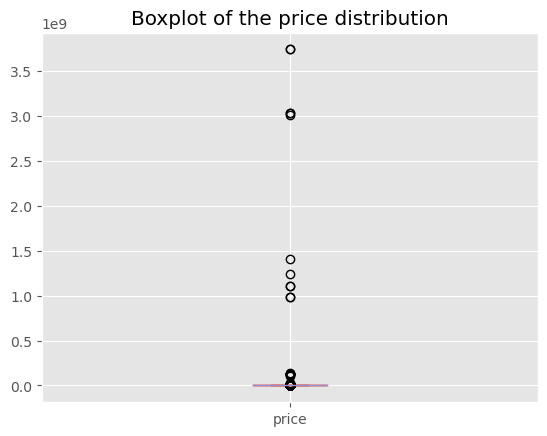

In [129]:
df['price'].plot(kind = 'box')
plt.title("Boxplot of the price distribution")

### Looks like we have a lot of outliers too...

Text(0.5, 1.0, 'Correlation Matrix')

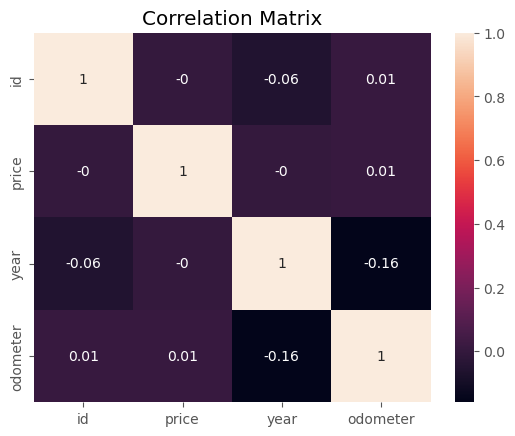

In [130]:
corr = df.corr(numeric_only = True).round(2)
sns.heatmap(corr, annot = True)
plt.title("Correlation Matrix")

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

## Remove ID and VIN columns
These two columns are not necessary in our analysis, they add no value

In [13]:
df_auto = df.drop(columns = ['id', 'VIN'], axis =1)
df_auto.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


## Remove outliers
Then based on our price graph above, anything above $1M should be removed

In [14]:
df_auto[df_auto['price'] > 1000000]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
280,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,al
1838,dothan,99999999,1993.0,ford,ranger,NaN,NaN,gas,99999.0,clean,automatic,NaN,NaN,NaN,NaN,al
26075,fresno / madera,1111111,2014.0,chevrolet,NaN,NaN,NaN,other,11.0,clean,automatic,NaN,NaN,NaN,NaN,ca
29386,humboldt county,1111111111,1999.0,ford,f350 super duty lariat,good,8 cylinders,diesel,149000.0,clean,automatic,rwd,full-size,pickup,white,ca
37409,modesto,1111111111,2020.0,jeep,NaN,NaN,NaN,gas,1000.0,clean,automatic,4wd,NaN,NaN,NaN,ca
37410,modesto,3009548743,2021.0,chevrolet,NaN,NaN,8 cylinders,gas,1000.0,clean,automatic,4wd,NaN,NaN,NaN,ca
68935,ventura county,2000000,2002.0,saturn,l-series l200 4dr sedan,good,4 cylinders,gas,164290.0,clean,automatic,fwd,mid-size,sedan,green,ca
91576,delaware,3024942282,2000.0,mercedes-benz,benz e320,NaN,NaN,gas,100000.0,clean,automatic,NaN,NaN,NaN,NaN,de
105843,orlando,6995495,2014.0,dodge,journey,NaN,4 cylinders,gas,135888.0,clean,automatic,fwd,NaN,SUV,NaN,fl
122470,atlanta,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,9999999.0,clean,manual,NaN,NaN,NaN,NaN,ga


In [15]:
df_auto = df_auto.drop(df_auto[df_auto['price'] > 1000000].index, axis = 0)

Text(0.5, 1.0, 'Boxplot of the price distribution')

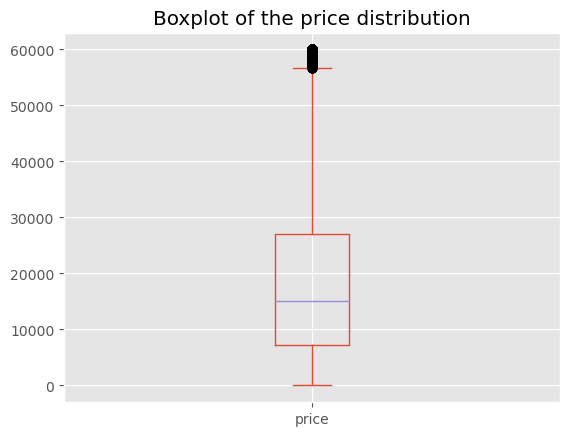

In [131]:
df_auto['price'].plot(kind = 'box')
plt.title("Boxplot of the price distribution")

In [17]:
print(df_auto['price'].sort_values(ascending=False))

233823    1000000
232829    1000000
91807     1000000
87052     1000000
83367     1000000
           ...   
272719          0
299707          0
299708          0
299709          0
391926          0
Name: price, Length: 426827, dtype: int64


Text(0.5, 1.0, 'KDE of the price distribution')

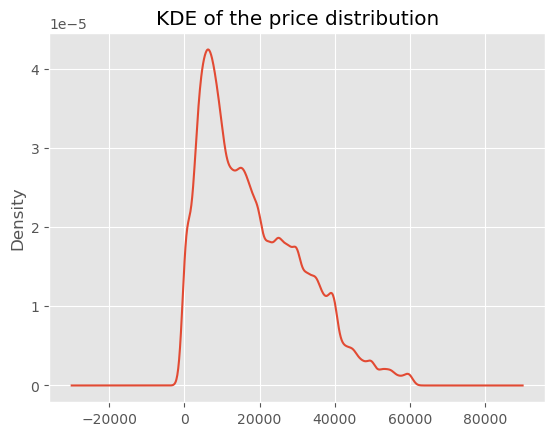

In [133]:
df_auto['price'].plot(kind = 'kde')
plt.title("KDE of the price distribution")

### Hmmm.... It didn't seem to be enough; Let's remove above 150k

In [19]:
df_auto = df_auto.drop(df_auto[df_auto['price'] < 1].index, axis = 0)
df_auto = df_auto.drop(df_auto[df_auto['price'] > 150000].index, axis = 0)

Text(0.5, 1.0, 'Boxplot of the price distribution')

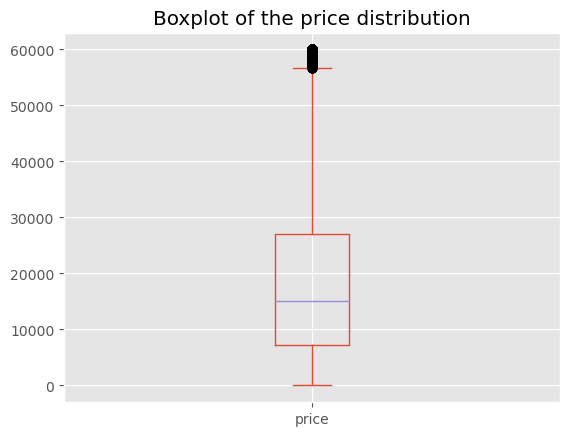

In [132]:
df_auto['price'].plot(kind = 'box')
plt.title("Boxplot of the price distribution")

### ok - we're getting there
60k seems to be a good trigger point

In [21]:
df_auto = df_auto.drop(df_auto[df_auto['price'] > 60000].index, axis = 0)

Text(0.5, 1.0, 'Boxplot of the price distribution')

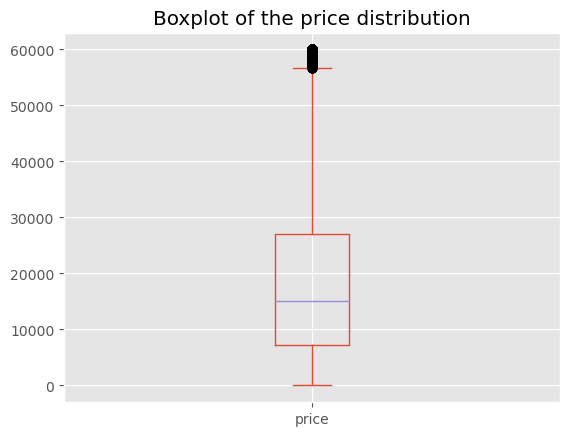

In [134]:
df_auto['price'].plot(kind = 'box')
plt.title("Boxplot of the price distribution")

Text(0.5, 1.0, 'KDE of the price distribution')

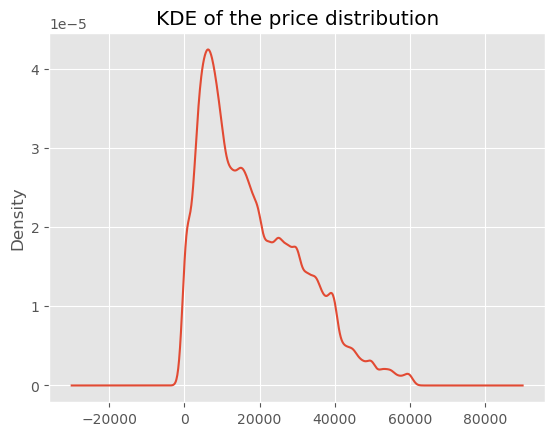

In [135]:
df_auto['price'].plot(kind = 'kde')
plt.title("KDE of the price distribution")

Text(0.4, 1, 'Histograms of numerical features')

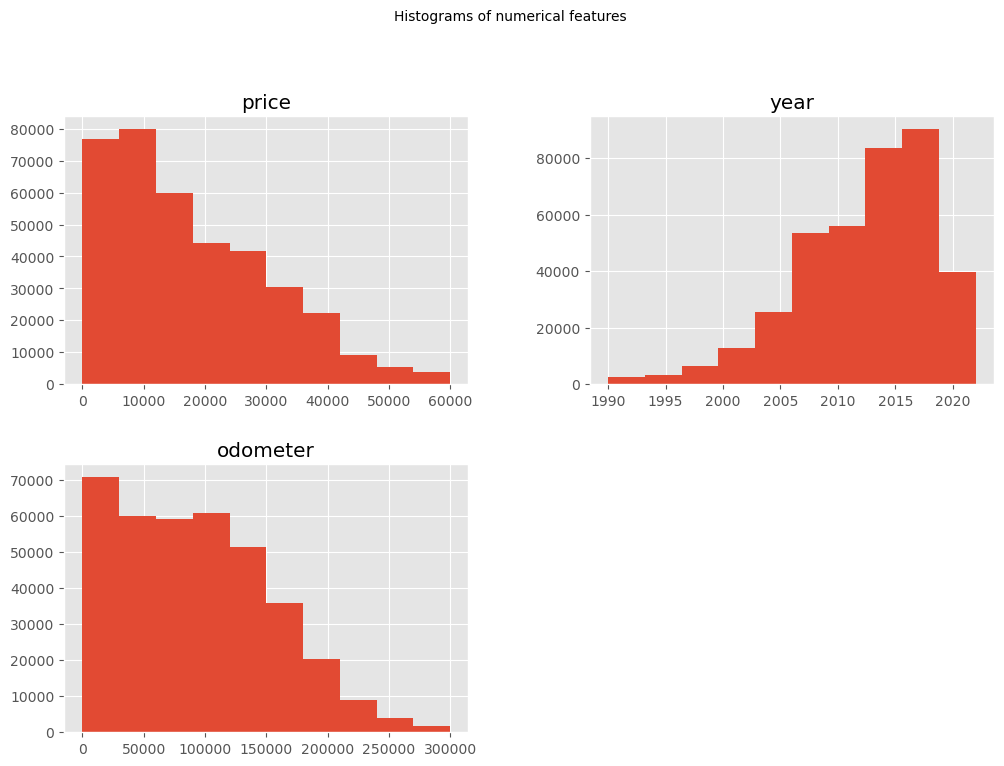

In [136]:
df_auto.hist(figsize = (12,8));
plt.figtext(0.4,1,"Histograms of numerical features")

Text(0.5, 1.0, 'Boxplot of the year distribution')

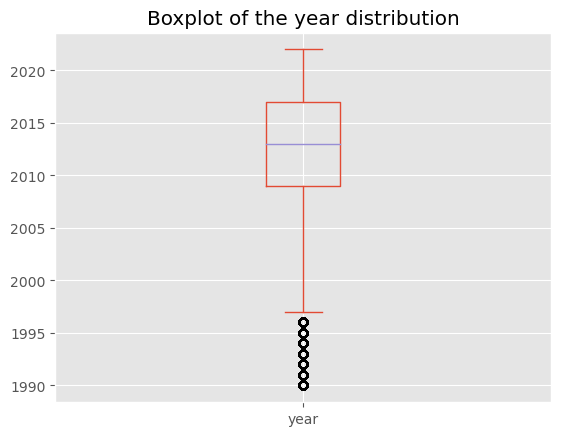

In [140]:
df_auto['year'].plot(kind = 'box')
plt.title("Boxplot of the year distribution")

### Year and odometer seems to have a lot of outliers too
Let's clean that up

In [26]:
df_auto = df_auto.drop(df_auto[df_auto['year'] < 1990].index, axis = 0)

Text(0.5, 1.0, 'Boxplot of the year distribution')

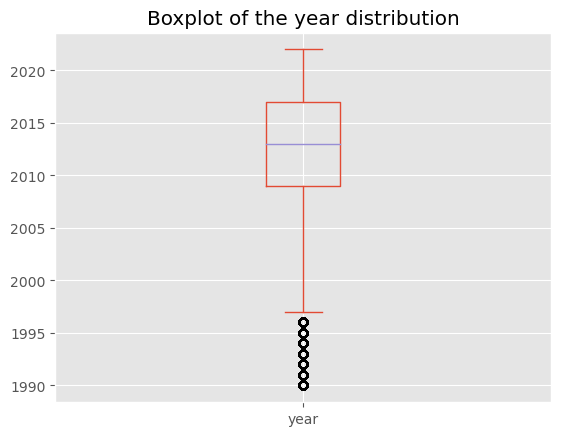

In [141]:
df_auto['year'].plot(kind = 'box')
plt.title("Boxplot of the year distribution")

Text(0.5, 1.0, 'Boxplot of the odometer distribution')

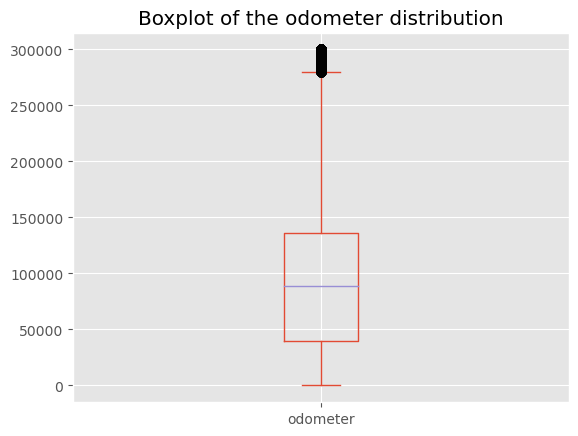

In [142]:
df_auto['odometer'].plot(kind = 'box')
plt.title("Boxplot of the odometer distribution")

In [29]:
df_auto = df_auto.drop(df_auto[df_auto['odometer'] > 300000].index, axis = 0)

Text(0.5, 1.0, 'Boxplot of the odometer distribution')

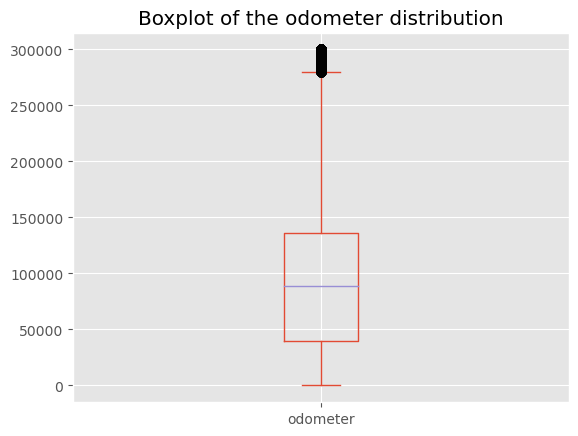

In [143]:
df_auto['odometer'].plot(kind = 'box')
plt.title("Boxplot of the odometer distribution")

Text(0.4, 1, 'Histograms of numerical features')

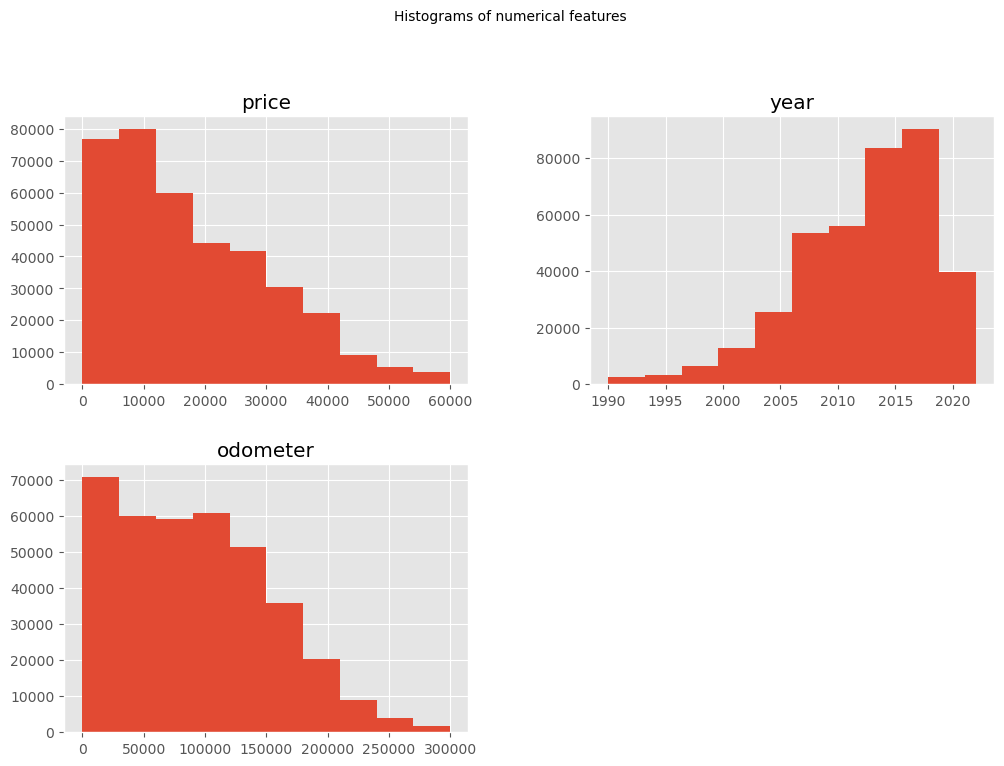

In [144]:
df_auto.hist(figsize = (12,8));
plt.figtext(0.4,1,"Histograms of numerical features")

In [395]:
df_auto.isna().mean() *100

region           0.000000
price            0.000000
year             0.000000
manufacturer     3.418206
model            0.893440
condition       38.311914
cylinders       40.882731
fuel             0.681928
odometer         0.000000
title_status     2.016332
transmission     0.472289
drive           30.353681
size            72.144311
type            21.052209
paint_color     29.416867
state            0.000000
dtype: float64

### Both the odometer and year seem skewed so let's apply the median to the NaN values, instead of the mean


In [32]:
print(df_auto['year'].median())
print(df_auto['odometer'].median())

2013.0
88809.0


In [33]:
df_auto['year'] = df_auto['year'].fillna(df_auto['year'].median())
df_auto['odometer'] = df_auto['odometer'].fillna(df_auto['odometer'].median())

In [34]:
df_auto.sample(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
407440,seattle-tacoma,9600,2013.0,ford,mustang,good,6 cylinders,gas,106844.0,clean,automatic,rwd,mid-size,convertible,blue,wa
18,bellingham,26850,2013.0,NaN,NaN,NaN,NaN,NaN,88809.0,NaN,NaN,NaN,NaN,NaN,NaN,wa
84840,hartford,13600,2020.0,subaru,impreza,like new,4 cylinders,gas,1900.0,rebuilt,automatic,4wd,NaN,sedan,red,ct
255852,north jersey,21995,2008.0,ford,f-550,NaN,NaN,diesel,70740.0,clean,automatic,4wd,NaN,other,white,nj
140294,chicago,2200,2005.0,ford,expedition xlt,like new,NaN,gas,164.0,clean,automatic,NaN,NaN,NaN,NaN,il
70508,yuba-sutter,7499,1999.0,lexus,rx 300 luxury suv,excellent,6 cylinders,gas,178597.0,NaN,automatic,4wd,NaN,SUV,NaN,ca
14659,tucson,17590,2020.0,kia,forte lxs sedan 4d,good,NaN,other,7384.0,clean,other,fwd,NaN,sedan,silver,az
79992,fort collins / north CO,11699,2015.0,chevrolet,volt,NaN,4 cylinders,other,51790.0,clean,automatic,fwd,compact,hatchback,grey,co
104641,orlando,5190,2008.0,ford,fusion,excellent,6 cylinders,gas,120000.0,clean,automatic,NaN,NaN,NaN,red,fl
220217,columbia / jeff city,7512,2010.0,toyota,camry,excellent,4 cylinders,gas,129086.0,clean,automatic,fwd,full-size,sedan,grey,mo


In [35]:
df_auto.isna().mean()*100

region           0.000000
price            0.000000
year             0.000000
manufacturer     3.418206
model            0.893440
condition       38.311914
cylinders       40.882731
fuel             0.681928
odometer         0.000000
title_status     2.016332
transmission     0.472289
drive           30.353681
size            72.144311
type            21.052209
paint_color     29.416867
state            0.000000
dtype: float64

### Let's look at the other columns and try to make sense of them
It wouldn't make sense to try to guess the manufacturer or the model and set them to a median value
because we would probably make the wrong assumptions. They also represent only 4% of the data
and we have more than 400k samples so dropping 16k is not so bad

In [36]:
df_auto['manufacturer'].value_counts()

manufacturer
ford               60309
chevrolet          46149
toyota             30995
honda              19707
nissan             17286
jeep               16884
ram                15626
gmc                14418
bmw                13567
dodge              11774
mercedes-benz       9777
hyundai             9363
subaru              8963
volkswagen          8438
lexus               7699
kia                 7542
audi                6982
cadillac            6241
acura               5676
chrysler            5530
mazda               5001
buick               4974
infiniti            4468
lincoln             3852
mitsubishi          3092
volvo               3037
mini                2249
rover               1849
jaguar              1830
pontiac             1815
porsche             1095
saturn              1070
mercury              975
alfa-romeo           824
tesla                774
fiat                 740
harley-davidson      134
aston-martin          11
land rover            10
ferrari     

In [37]:
df_auto2 = df_auto.dropna(axis = 0, subset = 'manufacturer')
df_auto3 = df_auto2.dropna(axis = 0, subset = 'model')

In [38]:
print(df_auto3.isna().mean()*100)
print(df_auto3.shape)

region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
condition       38.253725
cylinders       40.631906
fuel             0.597553
odometer         0.000000
title_status     1.983450
transmission     0.457956
drive           29.968835
size            72.229465
type            20.412468
paint_color     29.176015
state            0.000000
dtype: float64
(357458, 16)


In [39]:
df_auto3['transmission'].value_counts()

transmission
automatic    280351
other         58795
manual        16675
Name: count, dtype: int64

In [40]:
df_auto3['fuel'].value_counts()

fuel
gas         304145
other        25897
diesel       19023
hybrid        4773
electric      1484
Name: count, dtype: int64

In [41]:
df_auto3['title_status'].value_counts()

title_status
clean         338603
rebuilt         6686
salvage         3496
lien            1251
missing          237
parts only        95
Name: count, dtype: int64

Transmission, fuel and title status seem to have the same median/mean with automatic, gas and clean
so let's set those values

In [42]:
df_auto3['transmission'] = df_auto3['transmission'].fillna("automatic")
df_auto3['fuel'] = df_auto3['fuel'].fillna("gas")
df_auto3['title_status'] = df_auto3['title_status'].fillna("clean")

In [43]:
print(df_auto3.isna().mean()*100)
print(df_auto3.shape)

region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
condition       38.253725
cylinders       40.631906
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
drive           29.968835
size            72.229465
type            20.412468
paint_color     29.176015
state            0.000000
dtype: float64
(357458, 16)


In [44]:
df_auto3.groupby(by= ['manufacturer'])['model'].value_counts()

manufacturer  model                     
acura         mdx                           715
              tl                            468
              mdx sh-awd sport utility      464
              mdx sh-awd w/technology       259
              rdx                           258
                                           ... 
volvo         s60 fwd 4dr sdn t5              1
              740/gl                          1
              xc70 3.2 awd premier pzev       1
              v90 t5 cross country wagon      1
              s60 dynamic                     1
Name: count, Length: 20831, dtype: int64

By revisiting the model, we realize that people wrote pretty much anything they wanted. It would be
too time consuming to try to replace the proper model name with the correct one. On top of that
it would prbably bring no benefits to the pricing model. So we will drop column 'model'.

In [45]:
df_auto4 = df_auto3.drop(columns = ['model'], axis =1)

Same thing with the region, they have 404 different regions and seems to make the model processing so long. 


In [46]:
df_auto['region'].value_counts()

region
columbus                  3251
jacksonville              3044
omaha / council bluffs    2847
grand rapids              2841
central NJ                2823
                          ... 
meridian                    19
southwest MS                12
kansas city                  9
west virginia (old)          8
fort smith, AR               8
Name: count, Length: 404, dtype: int64

In [47]:
df_auto5 = df_auto4.drop(columns = ['region'], axis =1)

In [48]:
print(df_auto5.isna().mean()*100)
print(df_auto5.shape)

price            0.000000
year             0.000000
manufacturer     0.000000
condition       38.253725
cylinders       40.631906
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
drive           29.968835
size            72.229465
type            20.412468
paint_color     29.176015
state            0.000000
dtype: float64
(357458, 14)


In [49]:
df_auto5['condition'].value_counts()

condition
good         109440
excellent     87030
like new      18123
fair           4829
new             842
salvage         453
Name: count, dtype: int64

### Condition median/mean seems to be 'good', so let's apply that

In [50]:
df_auto5['condition'] = df_auto5['condition'].fillna("good")

In [51]:
df_auto5['cylinders'].value_counts()

cylinders
6 cylinders     82889
4 cylinders     68894
8 cylinders     56443
5 cylinders      1466
10 cylinders     1267
other             666
3 cylinders       507
12 cylinders       84
Name: count, dtype: int64

### Let's convert cylinders to numerical

In [56]:
df_auto5['cylinders'] = df_auto5['cylinders'].str.replace("6 cylinders", "6")
df_auto5['cylinders'] = df_auto5['cylinders'].str.replace("4 cylinders", "4")
df_auto5['cylinders'] = df_auto5['cylinders'].str.replace("8 cylinders", "8")
df_auto5['cylinders'] = df_auto5['cylinders'].str.replace("5 cylinders", "5")
df_auto5['cylinders'] = df_auto5['cylinders'].str.replace("10 cylinders", "10")
df_auto5['cylinders'] = df_auto5['cylinders'].str.replace("3 cylinders", "3")
df_auto5['cylinders'] = df_auto5['cylinders'].str.replace("12 cylinders", "12")
df_auto5['cylinders'] = df_auto5['cylinders'].str.replace("other", "6")

In [57]:
df_auto5['cylinders'].value_counts()

cylinders
6     83555
4     68894
8     56443
5      1466
10     1267
3       507
12       84
Name: count, dtype: int64

In [58]:
df_auto5['cylinders'] = pd.to_numeric(df_auto5['cylinders'])

In [59]:
df_auto5['cylinders'].median()

6.0

In [60]:
df_auto5['cylinders'] = df_auto5['cylinders'].fillna(6)

In [61]:
print(df_auto5.isna().mean()*100)
print(df_auto5.shape)

price            0.000000
year             0.000000
manufacturer     0.000000
condition        0.000000
cylinders        0.000000
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
drive           29.968835
size            72.229465
type            20.412468
paint_color     29.176015
state            0.000000
dtype: float64
(357458, 14)


In [62]:
df_auto5['drive'].value_counts()

drive
4wd    112144
fwd     93224
rwd     44964
Name: count, dtype: int64

In [63]:
df_auto5['size'].value_counts()

size
full-size      51398
mid-size       29454
compact        15832
sub-compact     2584
Name: count, dtype: int64

In [64]:
df_auto5['type'].value_counts()

type
sedan          76830
SUV            67821
pickup         37953
truck          26165
other          18296
coupe          14911
hatchback      14547
wagon           9738
van             7349
convertible     5836
mini-van        4362
offroad          428
bus              256
Name: count, dtype: int64

In [65]:
df_auto5['paint_color'].value_counts()

paint_color
white     66109
black     54760
silver    38155
blue      26822
red       25384
grey      21431
green      5833
custom     5682
brown      5583
orange     1493
yellow     1375
purple      539
Name: count, dtype: int64

Now, drive/size/type/paint color are all missing a lot of values and I'm not sure they would add more information to
our model. I believe the other factors are more important. The color could be an intriguing one if we wanted to 
predict on that specific subject but that's not the goal of this exercise. I might cover it if I have time at the
end of this exercise. So let's drop those.

In [66]:
df_auto6 = df_auto5.drop(columns = ['drive', 'size', 'type', 'paint_color'], axis =1)

In [67]:
print(df_auto6.isna().mean()*100)
print(df_auto6.shape)

price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
state           0.0
dtype: float64
(357458, 10)


## All right, I think we're in pretty good shape here

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Text(0.4, 1, 'Histograms of numerical features')

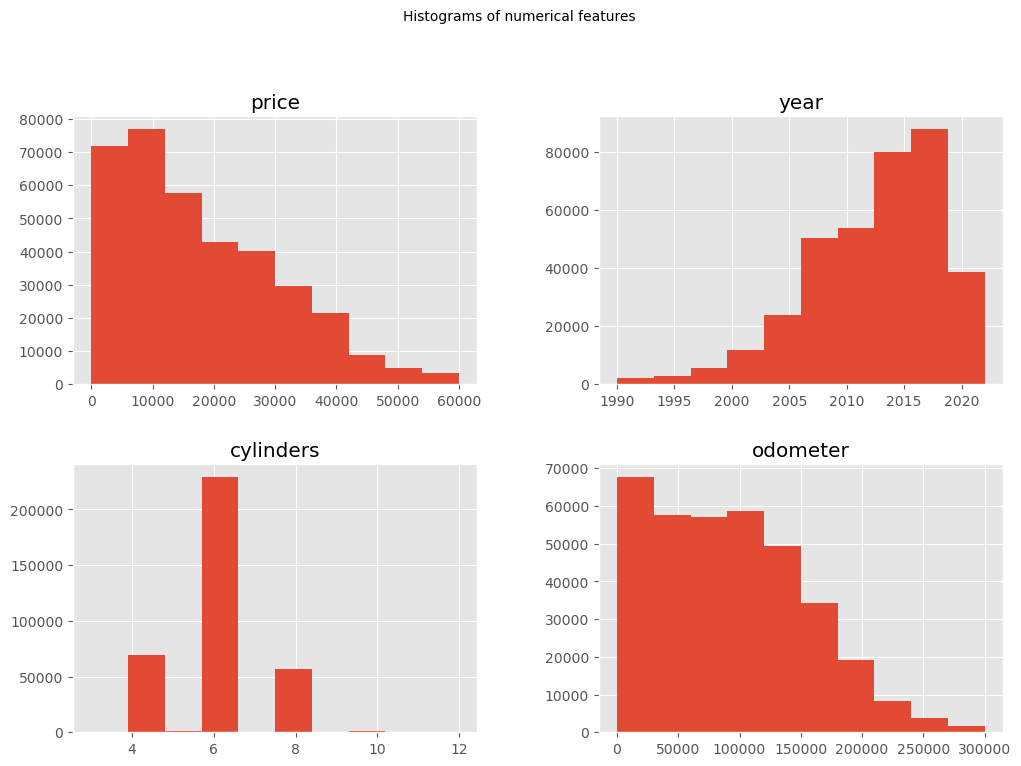

In [145]:
df_auto6.hist(figsize = (12,8));
plt.figtext(0.4,1,"Histograms of numerical features")

Let's get our training and test datasets

In [69]:
X = df_auto6.drop(['price'], axis = 1)
y = df_auto6[['price']]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

Let's plot the first 1000 points to get an idea

Text(0.4, 1, 'Pairplots of numerical features')

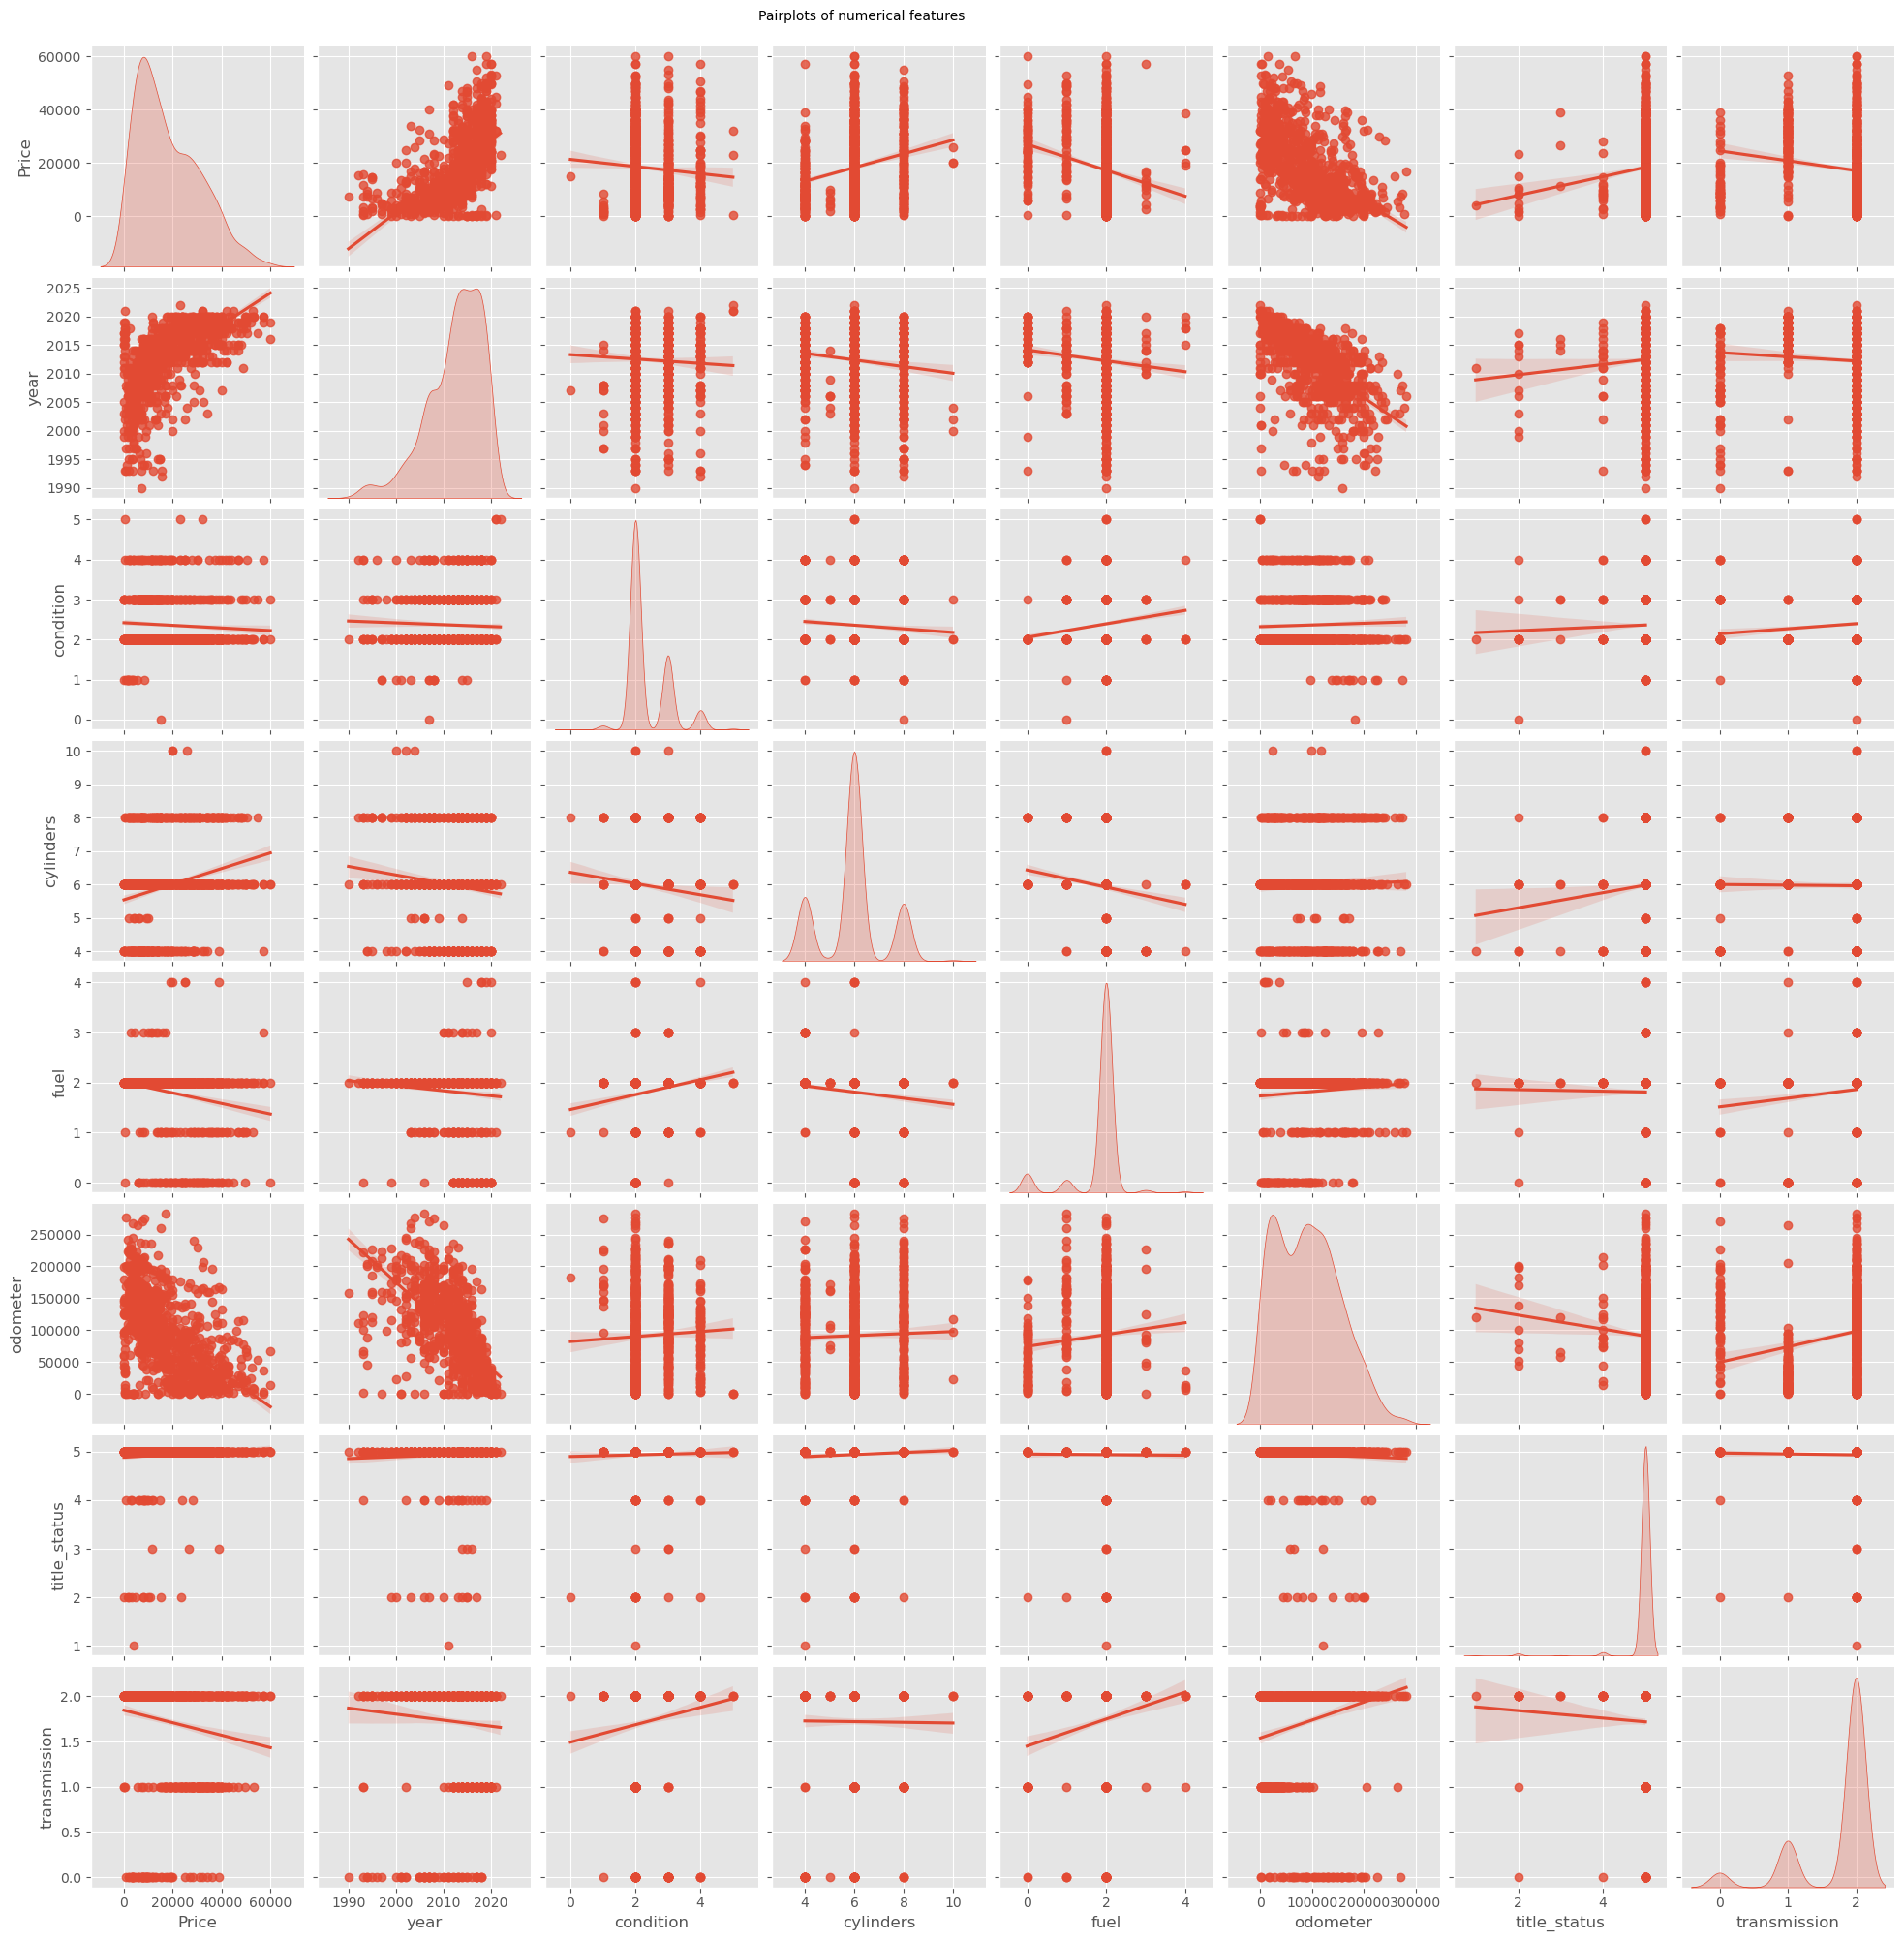

In [146]:
train_dataset = X_train.copy()
train_dataset.insert(0, "Price", y_train)
_ = sns.pairplot(train_dataset[:1000], kind="reg", diag_kind="kde")
plt.figtext(0.4,1,"Pairplots of numerical features")

Text(0.5, 1.0, 'Correlation Matrix')

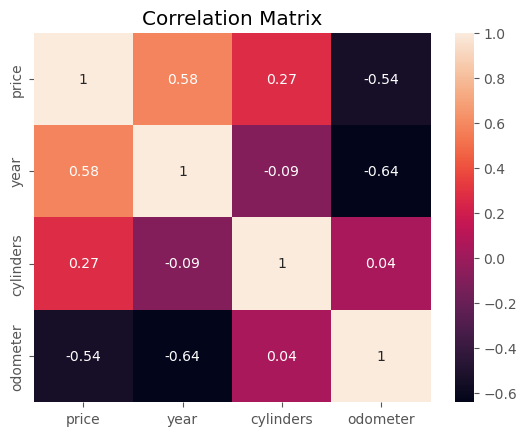

In [147]:
corr = df_auto6.corr(numeric_only = True).round(2)
sns.heatmap(corr, annot = True)
plt.title("Correlation Matrix")

Both state and manufacturer have a lot of values to convert so I'm going to leave them out for now and come back later.

In [74]:
X_train = X_train.drop(columns = ['manufacturer', 'state'], axis =1)

In [75]:
X_test = X_test.drop(columns = ['manufacturer', 'state'], axis =1)

In [76]:
print(X_train.sample(10))

X_train['transmission'].value_counts()

          year  condition  cylinders   fuel  odometer title_status  \
263486  2020.0       good        6.0    gas    6506.0        clean   
161817  2010.0       good        6.0    gas  102622.0        clean   
387677  2016.0  excellent        6.0    gas   72886.0        clean   
139433  2003.0       good        6.0    gas  161300.0        clean   
295531  2004.0  excellent        4.0    gas  184674.0        clean   
77956   2001.0       good        8.0    gas  178000.0        clean   
43746   2017.0       good        6.0  other   14317.0        clean   
52684   2014.0       good        6.0    gas   95031.0        clean   
222779  2020.0       good        6.0    gas   41273.0        clean   
300969  2016.0       good        6.0    gas   17302.0        clean   

       transmission  
263486        other  
161817    automatic  
387677    automatic  
139433    automatic  
295531       manual  
77956     automatic  
43746         other  
52684         other  
222779    automatic  
300969   

transmission
automatic    225461
other         47102
manual        13403
Name: count, dtype: int64

Let's convert the categorical features with OrdinalEncoder

In [77]:
oe_cond = OrdinalEncoder(categories = [['salvage', 'fair', 'good', 'excellent', 'like new', 'new']])
X_train['condition'] = oe_cond.fit_transform(X_train[['condition']])

In [78]:
oe_fuel = OrdinalEncoder(categories = [['other', 'diesel', 'gas', 'hybrid', 'electric']])
X_train['fuel'] = oe_fuel.fit_transform(X_train[['fuel']])

In [79]:
oe_title = OrdinalEncoder(categories = [['missing', 'parts only', 'salvage', 'lien', 'rebuilt', 'clean']])
X_train['title_status'] = oe_title.fit_transform(X_train[['title_status']])

In [80]:
oe_trans = OrdinalEncoder(categories = [['manual', 'other', 'automatic']])
X_train['transmission'] = oe_trans.fit_transform(X_train[['transmission']])

In [81]:
X_test['condition'] = oe_cond.fit_transform(X_test[['condition']])
X_test['fuel'] = oe_fuel.fit_transform(X_test[['fuel']])
X_test['title_status'] = oe_title.fit_transform(X_test[['title_status']])
X_test['transmission'] = oe_trans.fit_transform(X_test[['transmission']])

In [82]:
X_train.sample(10)

,year,condition,cylinders,fuel,odometer,title_status,transmission
266840,2017.0,2.0,8.0,2.0,39508.0,5.0,1.0
286447,2007.0,2.0,6.0,2.0,149214.0,5.0,2.0
78236,2001.0,2.0,6.0,2.0,178000.0,5.0,2.0
87113,2014.0,2.0,6.0,2.0,86500.0,5.0,2.0
250458,2003.0,2.0,6.0,2.0,102561.0,5.0,2.0
409691,2006.0,2.0,6.0,2.0,123146.0,5.0,2.0
9863,2018.0,2.0,6.0,0.0,10025.0,5.0,1.0
8961,2018.0,3.0,4.0,2.0,35550.0,2.0,2.0
173638,2013.0,3.0,4.0,2.0,76819.0,5.0,2.0
106461,2007.0,4.0,8.0,2.0,154000.0,5.0,2.0


### Let's start creating some models with pipelines and gridsearch

In [84]:
lin_model = Pipeline([
    ("scaler", StandardScaler()),
    ("regress", LinearRegression())
])

## Linear Model

In [86]:
lin_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('regress', LinearRegression())])

In [87]:
train_mse = mean_squared_error(y_train, lin_model.predict(X_train))
test_mse = mean_squared_error(y_test, lin_model.predict(X_test))
print(train_mse)
print(test_mse)

82268928.07320078
83346381.2505675


In [88]:
score = lin_model.score(X_test, y_test)
print(score)

0.5066341906095494


## Ridge with gridsearch

In [90]:
ridgegrid_model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])
ridge_param_dict = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(ridgegrid_model, param_grid=ridge_param_dict, scoring='neg_mean_squared_error', cv=5, verbose = 3, n_jobs = -1, return_train_score=True)

In [91]:
ridge_grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1, param_grid={'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [92]:
ridge_grid.best_params_

{'ridge__alpha': 10}

Looks like alpha = 10 is the best

In [93]:
ridge_model = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(alpha = 10))
])

In [94]:
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=10))])

In [95]:
train_RG_mse = mean_squared_error(y_train, ridge_model.predict(X_train))
test_RG_mse = mean_squared_error(y_test, ridge_model.predict(X_test))
print(train_RG_mse)
print(test_RG_mse)

82268928.13440995
83346405.18096152


In [96]:
score = ridge_model.score(X_test, y_test)
print(score)

0.5066340489544705


## Lasso with gridsearch

In [97]:
lassogrid_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(random_state=42))
])
lasso_param_dict = {'lasso__alpha': [0.01, 0.1, 1, 10, 100]}

lasso_grid = GridSearchCV(lassogrid_model, param_grid=lasso_param_dict, scoring='neg_mean_squared_error', cv=5, verbose = 3, n_jobs = -1, return_train_score=True)

In [98]:
lasso_grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso(random_state=42))]),
             n_jobs=-1, param_grid={'lasso__alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [99]:
lasso_grid.best_params_

{'lasso__alpha': 0.01}

Looks like alpha = 0.01 is the best for Lasso

In [100]:
lasso_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha = 0.01))
])

In [101]:
lasso_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.01))])

In [102]:
train_lasso_mse = mean_squared_error(y_train, lasso_model.predict(X_train))
test_lasso_mse = mean_squared_error(y_test, lasso_model.predict(X_test))
print(train_lasso_mse)
print(test_lasso_mse)

82268928.07366163
83346383.31641795


In [103]:
score = lasso_model.score(X_test, y_test)
print(score)

0.5066341783808244


So it looks like the lasso model performs better than the ridge model and slightly better than the linear regression. Now let's look at the polynomial features and the sequential feature selector just in case we can get a better model.

In [105]:

sequential_model = Pipeline([('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
                             ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=6)),
                             ('linreg', LinearRegression())])

In [106]:
sequential_model.fit(X_train, y_train)
sequential_train_mse = mean_squared_error(y_train, sequential_model.predict(X_train))
sequential_test_mse = mean_squared_error(y_test, sequential_model.predict(X_test))
score = sequential_model.score(X_test, y_test)
print(sequential_train_mse)
print(sequential_test_mse)
print(score)

74693445.46181212
76163432.78573905
0.5491533873639478


ok - the sequential feature with polynomial = 2 did't get better results... let's try with polynomial = 3

In [107]:
sequential_model3 = Pipeline([('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
                             ('selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=6)),
                             ('linreg', LinearRegression())])

In [108]:
sequential_model3.fit(X_train, y_train)
sequential3_train_mse = mean_squared_error(y_train, sequential_model3.predict(X_train))
sequential3_test_mse = mean_squared_error(y_test, sequential_model3.predict(X_test))
score = sequential_model3.score(X_test, y_test)
print(sequential3_train_mse)
print(sequential3_test_mse)
print(score)

74650390.54798763
76193085.98031326
0.5489778563796075


That went down, so it looks like our best model was the simple linear regression beating lasso and ridge 
by a very small margin and polynomial with sequential feature selection by a bigger margin

In [109]:
lin_coef = lin_model.named_steps['regress'].coef_
print(lin_coef)

[[ 5493.80855912  -250.77475656  3872.12318803 -1642.54452365
  -3306.51507371   618.44800252  -606.51325739]]


In [110]:
X_train.head()

,year,condition,cylinders,fuel,odometer,title_status,transmission
140196,2010.0,2.0,6.0,2.0,1.0,5.0,2.0
341944,2009.0,2.0,6.0,2.0,166500.0,5.0,2.0
211132,2018.0,2.0,6.0,2.0,4007.0,5.0,1.0
354521,2008.0,2.0,6.0,2.0,209800.0,5.0,2.0
226844,2017.0,2.0,8.0,2.0,70435.0,5.0,2.0


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

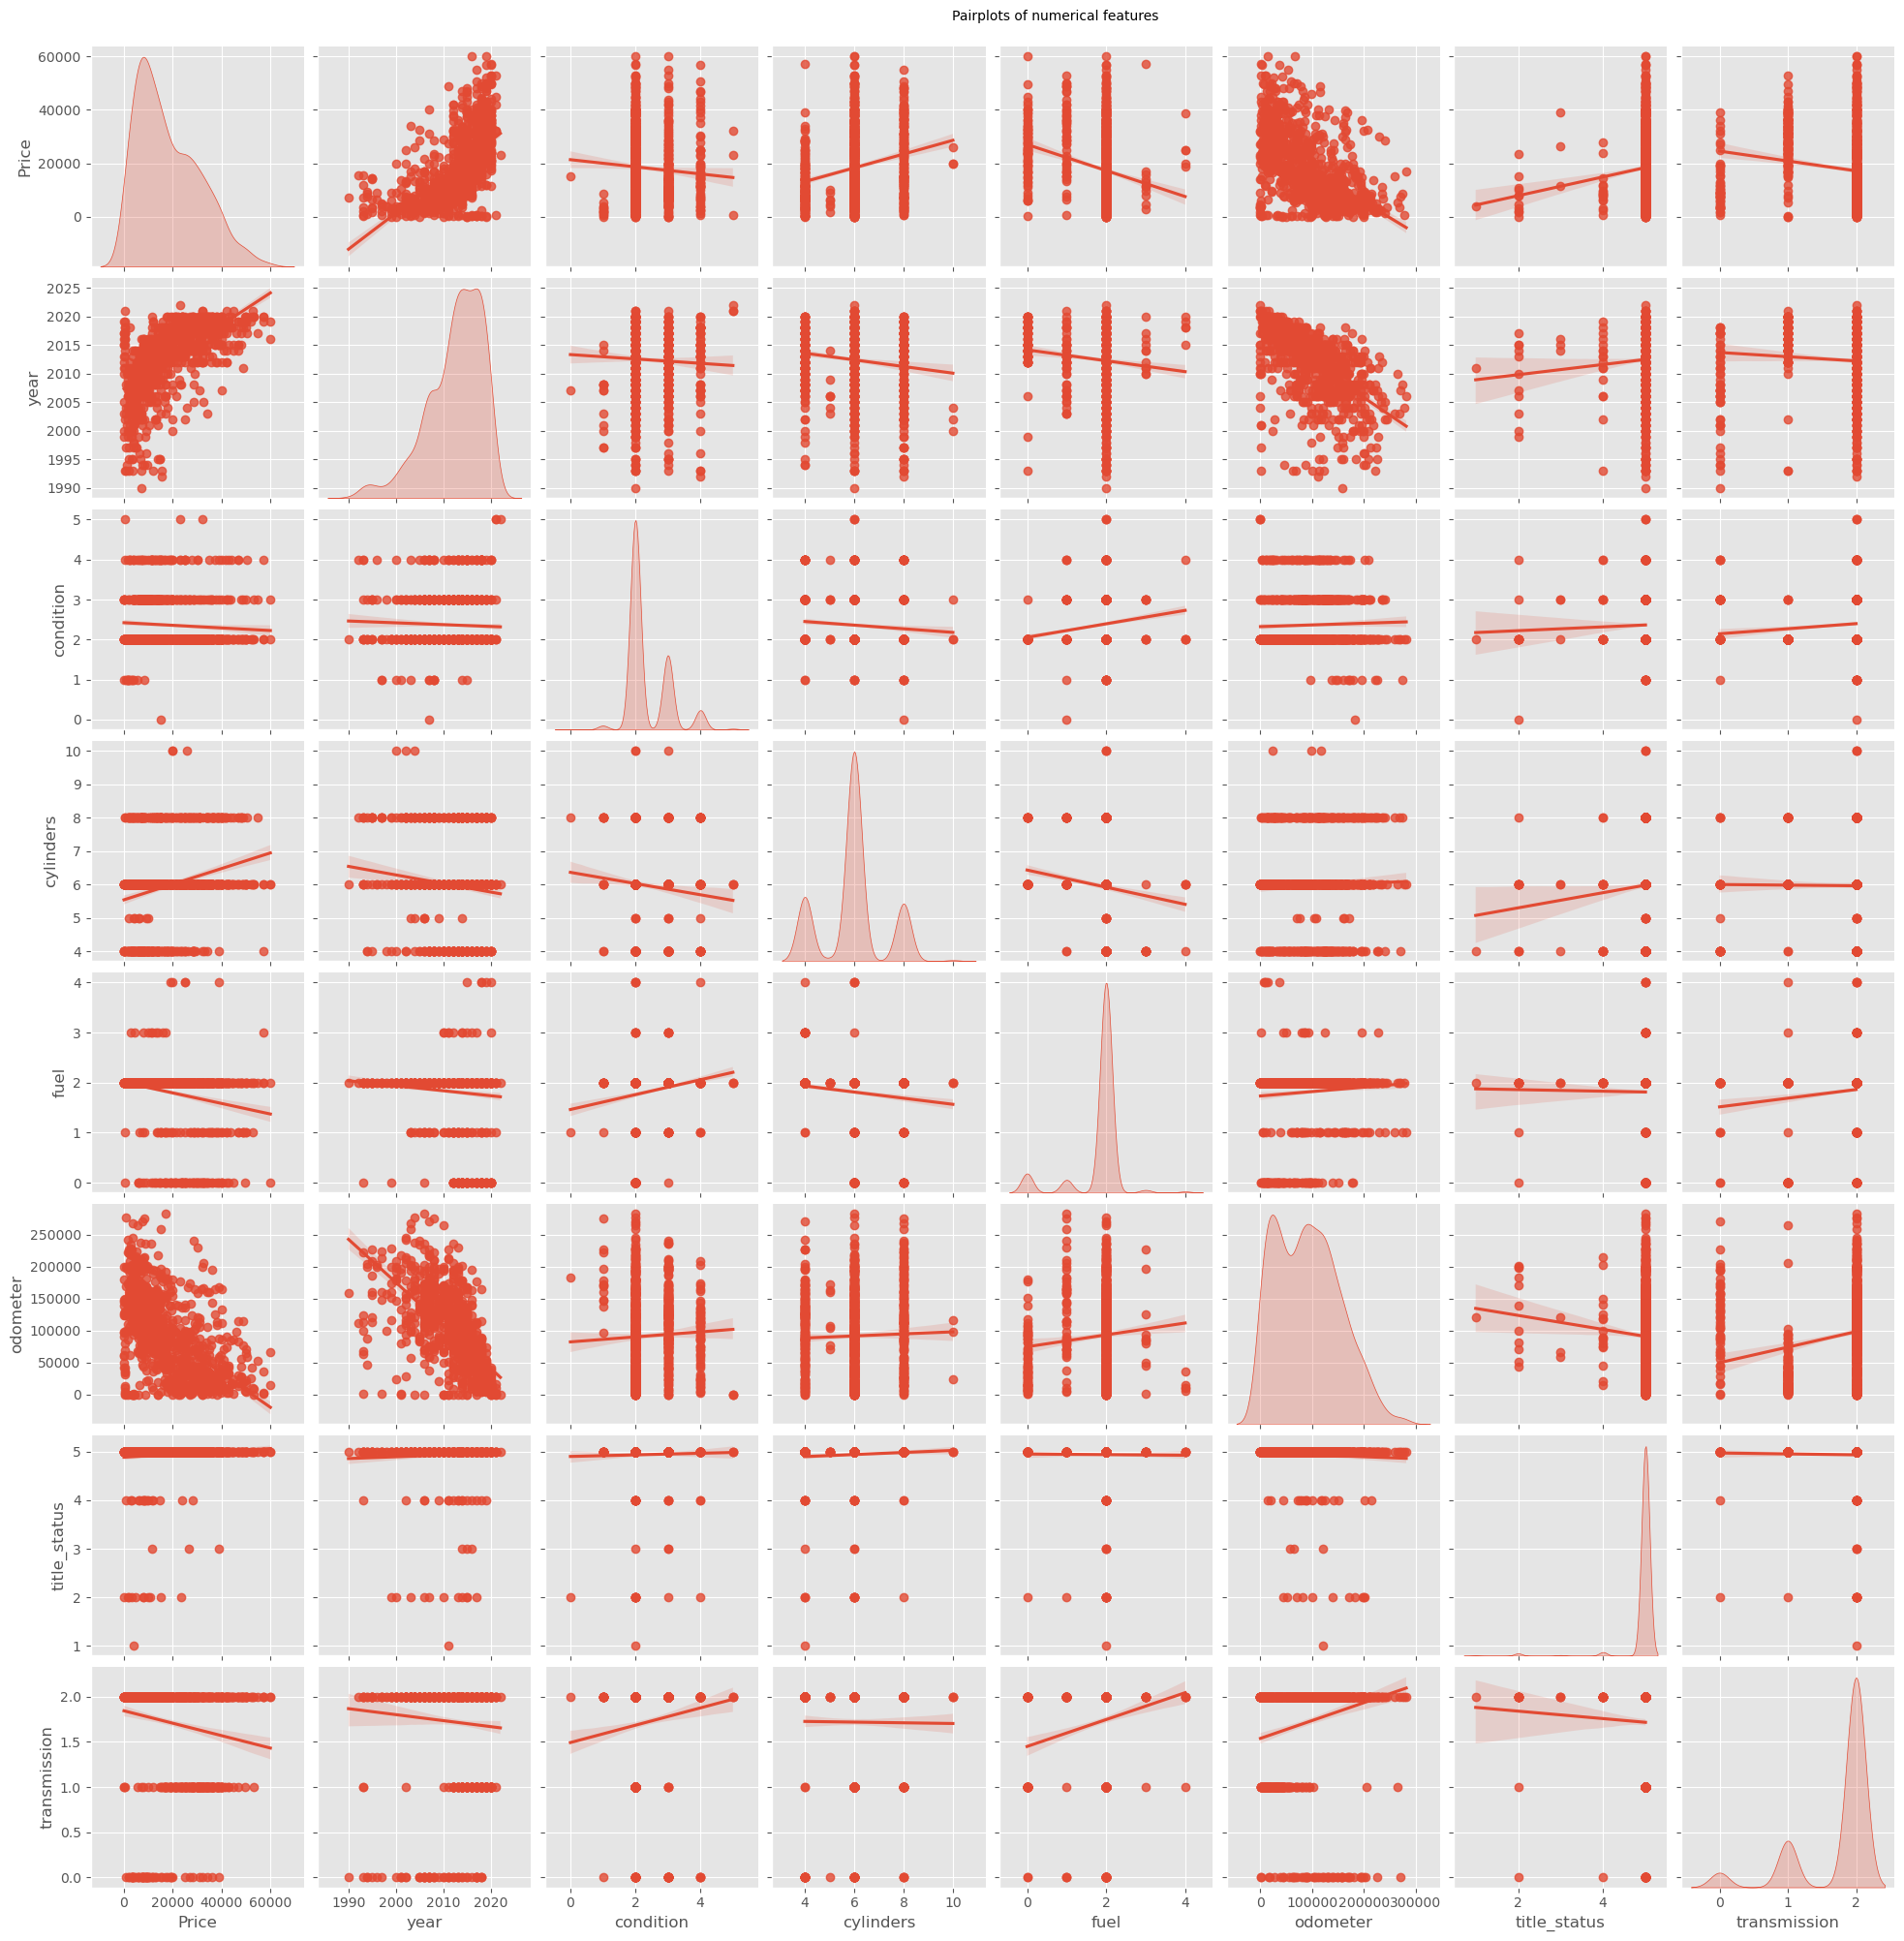

In [155]:
train_dataset = X_train.copy()
train_dataset.insert(0, "Price", y_train)
_ = sns.pairplot(train_dataset[:1000], kind="reg", diag_kind="kde")
plt.figtext(0.5,1,"Pairplots of numerical features")
plt.savefig("images/pairplots.png")

Text(0.5, 1.0, 'Correlation Matrix')

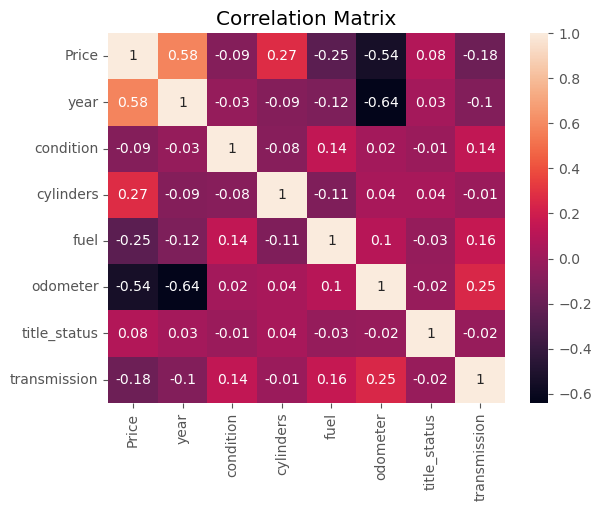

In [148]:
corr = train_dataset.corr(numeric_only = True).round(2)
sns.heatmap(corr, annot = True)
plt.title("Correlation Matrix")

So, our best model in this exercise is the linear regression model and it seems like the price
of a car is correlated with the year and inversely correlated with the odometer.

Then if we trickle down, we can see that the number of cylinders and the fuel will also affect
the price but at a lesser level.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### So, during the course of our analysis, we found that the following parameters affect the price of a used car

Positive impacts
- Year impacts the price of a car the highest with a direct correlation; the younger the car -> the higher the price
- The number of cylinders also impacts the price but in a smaller fashion; the more cylinders -> the higher the price

Negative impacts
- Odometer impacts the price in a negative way; the higher the mileage -> the lower the price
- The type of fuel also impacts the price; it seems like hybrid and electric cars tend to lose value faster than the other types


### So, the recommendation is to get used cars that are younger, lower odometer with a higher number of cylinders and stay away from electric or hybrid vehicles.

### In the next steps, we'll examine the impact of re-instating the state and the car manufacturer, possibly also looking at the paint color only on pricing fluctuation.